<center><h1> Computational Learning Theory - Machine Learning 2015-2016</h1></center>
<a id='top'></a>
<div style="margin-top:1cm">Author: Afentoulidis Gregory</div>
<div>Student ID : 4521862</div>

<h3>Table of contents</h3>
<ul>
    <li><a href="#intro"> Creating Artificial 2d classification problems</a></li>
    <li><a href='#exA'>Exercise A</a></li>
    <li><a href='#exB'>Exercise B</a></li>
    <li><a href='#exC'>Exercise C</a></li>
    <li><a href='#exD'>Exercise D</a></li>
    <li><a href='#exE'>Exercise E</a></li>
    <li><a href='#exF'>Exercise F</a></li>
    <li><a href='#exG'>Exercise G</a></li>
</ul>

In [139]:
% matplotlib inline
from __future__ import division
from numpy.lib.arraysetops import unique
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from math import log,e

<a id="intro"></a>
<center> <h2> Creating Artificial 2d classification problems</h2></center>
<div style="text-align:right">
<a href="#top">[Back to top]</a>
</div>

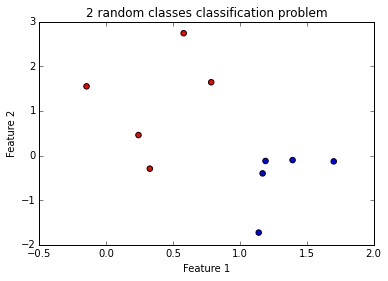

In [18]:
# make a 2 class artificial data set 
xs,ys = make_classification(n_samples=10,n_features=2,n_informative=2,
                            n_redundant=0,n_clusters_per_class=1)
colors = ['blue' if e==1 else 'red' for e in ys]
plt.scatter(xs[:,0],xs[:,1],c=colors,s=30)
plt.title("2 random classes classification problem")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

In [7]:
# The actual values of the data set above 
# hardcoded here in a 2d array
arr = [[-0.14438037,  1.5502988 ],
       [ 1.19218964, -0.12159595],
       [ 0.24353331,  0.45832657],
       [ 1.17044819, -0.40017028],
       [ 1.70146337, -0.13138631],
       [ 1.14137599, -1.72611682],
       [ 0.58097113,  2.7394138 ],
       [ 1.39423718, -0.10275973],
       [ 0.32818943, -0.29464645],
       [ 0.7865644 ,  1.64163247]]
dataset = pd.DataFrame(arr,columns=['Feat1','Feat2'])
dataset['Labels']= [-1, 1, -1, 1, 1, 1, -1, 1, -1, -1]

In [9]:
# the test dataset in table form 
# -1 responds to class ω1
# 1 responds to class ω2
dataset

,Feat1,Feat2,Labels
0,-0.144380,1.550299,-1
1,1.192190,-0.121596,1
2,0.243533,0.458327,-1
3,1.170448,-0.400170,1
4,1.701463,-0.131386,1
5,1.141376,-1.726117,1
6,0.580971,2.739414,-1
7,1.394237,-0.102760,1
8,0.328189,-0.294646,-1
9,0.786564,1.641632,-1


<a id="exA"></a>
<center> <h2> A Weak Learnel - A Decision stump classifier</h2></center>
<div style="text-align:right">
<a href="#top">[Back to top]</a>
</div>

In [43]:
# Stump function returns the best threshold,sign and error found
# given a dataframe containing the data set and a feature name
def stump(df,feat):

    fVals = list(unique(df[feat].values))
    fVals.sort()
    thres = [(fVals[i]+fVals[i+1])/2 for i in range(0,len(fVals)-1)]
    dataPoints = df.shape[0]

    # results contains missclassification error, threshold value and sign
    res = {'threshold':0,'error':2,'sign':''}
    #print("Number of dataPoints: %d" %dataPoints)
    # class1 label = -1 and class2 label = 1
    for th in thres:
        #bigger than thres then class1, less than thres then class2
        missClassNo1 = len(df[(df[feat]>th) & (df['Labels']==1)]) + \
                       len(df[(df[feat]<th) & (df['Labels']==-1)])
        missClassErr1 = missClassNo1 / dataPoints
        
        missClassNo2 = len(df[(df[feat]>th) & (df['Labels']==-1)]) + \
                       len(df[(df[feat]<th) & (df['Labels']==1)])
        missClassErr2 = missClassNo2 / dataPoints
        
        if missClassErr1 < missClassErr2:
            sign = '>'
            minimum = missClassErr1
        else:
            sign = '<'
            minimum = missClassErr2

        if minimum < res['error']:
            res['threshold'] = th ; res['error']= minimum ; res['sign'] = sign
    return res


In [116]:
def stumpClassifier(dataset,weighted=False):
    finalRes = {'feature':'none','threshold':0,'error':2,'sign':''}
    for f in dataset.columns:
        if f=='Labels' : continue
        
        # choose between the weighted and non-weighted version
        # of stump classification
        if weighted:
            featBest = weightedStump(dataset,f)
        else:
            featBest = stump(dataset,f)
        
        if featBest['error'] < finalRes['error']:
            finalRes['feature'] = f
            finalRes['threshold'] = featBest['threshold']
            finalRes['error'] = featBest['error']
            finalRes['sign'] = featBest['sign']
    return finalRes

<a id="exB"></a>
<center> <h2> Decision stump applied to binary classification with Gaussian classes</h2></center>
<div style="text-align:right">
<a href="#top">[Back to top]</a>
</div>

<p>We first try the decision stump classifier in two simple data sets that we create</p>

{'threshold': 0.96397019500000003, 'sign': '<', 'feature': 'Feat1', 'error': 0.0}


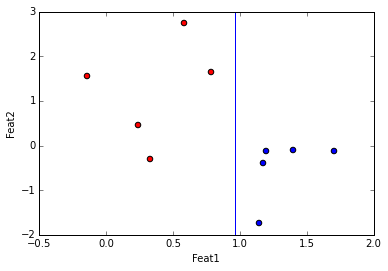

In [49]:
# A random binary classification problem and the results returned by our
# stump classifier. The decision boundary returned is also plotted as a 
# vertical line. The sign '<' indicates that values of Feat1 below the
# found threshold are assigned to ω1 (red class) while data points with 
# value of Feat1 above that threshold are assigned to ω2 (blue class)

ax = dataset[dataset['Labels']==-1].plot(kind='scatter',x='Feat1',y='Feat2',
                                    s=30,
                                   c='red')
dataset[dataset['Labels']==1].plot(ax=ax,kind='scatter',x='Feat1',y='Feat2',
                                   s=30,
                                   c='blue')
stumpRes = stumpClassifier(dataset)
print(stumpRes)
plt.axvline(stumpRes['threshold'])

In [52]:
# testing it with another simple data set found on the internet
# to be sure it is correct

def loadSimpleData():
    datMat = np.matrix([[1,2.1],[2,1.1],[1.3,1],[1,1],[2,1]])
    classLabels = [1.0,1.0,-1.0,-1.0,1.0]
    return datMat,classLabels
m,n = loadSimpleData()
simpleData = pd.DataFrame(m,columns=['Feat1','Feat2'])
simpleData['Labels'] = n
simpleData

,Feat1,Feat2,Labels
0,1.0,2.1,1
1,2.0,1.1,1
2,1.3,1.0,-1
3,1.0,1.0,-1
4,2.0,1.0,1


In [53]:
sR = stumpClassifier(simpleData)

In [55]:
sR

{'error': 0.2,
 'feature': 'Feat1',
 'sign': '<',
 'threshold': 1.6499999999999999}

{'threshold': 1.6499999999999999, 'sign': '<', 'feature': 'Feat1', 'error': 0.2}


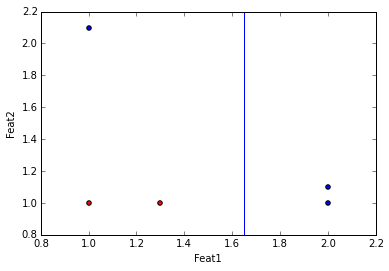

In [62]:
ax = simpleData[simpleData['Labels']==-1].plot(kind='scatter',x='Feat1',
                                         y='Feat2',
                                         c='red')
simpleData[simpleData['Labels']==1].plot(ax=ax,kind='scatter',x='Feat1',
                                         y='Feat2',
                                         c='blue')
sRes = stumpClassifier(simpleData)
print(sRes)
plt.axvline(sRes['threshold'])
plt.savefig('simpleData.png')

In [65]:
# Create the two class 2d gaussian data
means = [[0,0],[2,0]]
covMat = [[1,0],[0,1]]
gaussClass1 = np.random.multivariate_normal(means[0],covMat,50)
gaussClass2 = np.random.multivariate_normal(means[1],covMat,50)
gaussData = np.concatenate((gaussClass1,gaussClass2),axis=0)

# Create a DataFrame from these data
gaussDataFrame = pd.DataFrame(gaussData,columns=['Feat1','Feat2'])
gaussDataFrame['Labels'] = 50*[-1] + 50*[1]


{'threshold': 0.94485021680397752, 'sign': '<', 'feature': 'Feat1', 'error': 0.18}


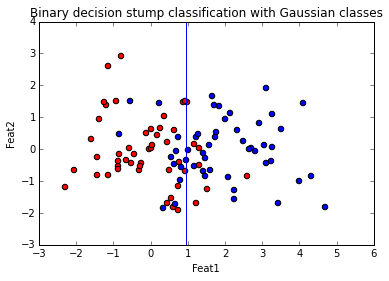

In [153]:
ax = gaussDataFrame[gaussDataFrame['Labels']==-1].plot(kind='scatter',
                                    x='Feat1',y='Feat2',
                                    s=30,
                                   c='red')
gaussDataFrame[gaussDataFrame['Labels']==1].plot(ax=ax,kind='scatter',
                                   x='Feat1',y='Feat2',
                                   s=30,
                                   c='blue')
sRgauss = stumpClassifier(gaussDataFrame)
print(sRgauss)
plt.axvline(sRgauss['threshold'])
plt.savefig('stump_on_gaussian.png')
plt.title('Binary decision stump classification with Gaussian classes')
#plt.title('Two Gaussian classes with identity covariance matrix')
#plt.savefig("gaussian.png")

<a id="exC"></a>
<center> <h2> Decision stump classification on digits</h2></center>
<div style="text-align:right">
<a href="#top">[Back to top]</a>
</div>

In [84]:
# Importing the digits data set
# Balancing the data set to have 500 data points per class 
# and also add labels to the classes
# Digits 0 --> label -1
# Digits 1 --> label 1

dig = pd.read_csv('dataset.csv',header=0)
dig = dig.drop('Unnamed: 0',axis=1)
digits = dig.drop(range(500,554) + range(1054,1125))
digits['Labels'] = 500*[-1] + 500*[1]
digits.index = range(0,1000)

In [85]:
digits.ix[:2,0:65]

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V56,V57,V58,V59,V60,V61,V62,V63,V64,Labels
0,0,16,96,240,192,16,0,0,0,112,...,0,0,0,96,224,112,16,0,0,-1
1,0,0,160,255,96,0,0,0,0,112,...,0,0,0,160,255,240,48,0,0,-1
2,0,0,240,32,224,208,32,0,0,0,...,0,0,0,160,192,80,0,0,0,-1


In [99]:
# Creating the 10 different training sets
# with 50 data points per class every time
# the remaining data are use for test sets

train1 = pd.concat([digits.ix[0:49,:],digits.ix[500:549,:]])
test1 = digits.drop(range(0,50) + range(500,550))

train2 = pd.concat([digits.ix[50:99,:],digits.ix[550:599,:]])
test2 = digits.drop(range(50,100) + range(550,600))

train3 = pd.concat([digits.ix[100:149,:],digits.ix[600:649,:]])
test3 = digits.drop(range(100,150) + range(600,650))

train4 = pd.concat([digits.ix[150:199,:],digits.ix[650:699,:]])
test4 = digits.drop(range(150,200) + range(650,700))

train5 = pd.concat([digits.ix[200:249,:],digits.ix[700:749,:]])
test5 = digits.drop(range(200,250) + range(700,750))

train6 = pd.concat([digits.ix[250:299,:],digits.ix[750:799,:]])
test6 = digits.drop(range(250,300) + range(750,800))

train7 = pd.concat([digits.ix[300:349,:],digits.ix[800:849,:]])
test7 = digits.drop(range(300,350) + range(800,850))

train8 = pd.concat([digits.ix[350:399,:],digits.ix[850:899,:]])
test8 = digits.drop(range(350,400) + range(850,900))

train9 = pd.concat([digits.ix[400:449,:],digits.ix[900:949,:]])
test9 = digits.drop(range(400,450) + range(900,950))

train10 = pd.concat([digits.ix[450:499,:],digits.ix[950:999,:]])
test10 = digits.drop(range(450,500) + range(950,1000))

In [89]:
# train a stumpClassifier for every training set 
# sResults contains all the classification errors
# from the training sets

sResults=[]
for tset in [train1,train2,train3,train4,train5,train6,train7,train8,
            train9,train10]:
    sResults.append(stumpClassifier(tset))

# print all results from the training phase
for result in sResults:
    print(result)

{'threshold': 24.0, 'sign': '<', 'feature': 'V37', 'error': 0.01}
{'threshold': 40.0, 'sign': '<', 'feature': 'V37', 'error': 0.0}
{'threshold': 56.0, 'sign': '<', 'feature': 'V37', 'error': 0.0}
{'threshold': 120.0, 'sign': '<', 'feature': 'V29', 'error': 0.02}
{'threshold': 48.0, 'sign': '<', 'feature': 'V37', 'error': 0.0}
{'threshold': 120.0, 'sign': '<', 'feature': 'V29', 'error': 0.0}
{'threshold': 56.0, 'sign': '<', 'feature': 'V37', 'error': 0.0}
{'threshold': 48.0, 'sign': '<', 'feature': 'V29', 'error': 0.01}
{'threshold': 64.0, 'sign': '<', 'feature': 'V29', 'error': 0.0}
{'threshold': 40.0, 'sign': '<', 'feature': 'V29', 'error': 0.0}


In [91]:
# a function to calculate the classification error 
# of a trained stump and 

def classificationError(trainedStump,testSet):
    thres = trainedStump['threshold']
    f = trainedStump['feature']
    missClassified = len(testSet[(testSet[f]>thres) & \
                                 (testSet['Labels']==-1)])+\
                     len(testSet[(testSet[f]<thres) &\
                                 (testSet['Labels']==1)])
    return missClassified/len(testSet)


In [100]:
classErrors = []
testSets = [test1,test2,test3,test4,test5,test6,test7,test8,\
           test9,test10]

for trStump,testSet in zip(sResults,testSets):
    classErrors.append(classificationError(trStump,testSet))


In [101]:
classErrors

[0.015555555555555555,
 0.016666666666666666,
 0.011111111111111112,
 0.035555555555555556,
 0.011111111111111112,
 0.03777777777777778,
 0.011111111111111112,
 0.015555555555555555,
 0.016666666666666666,
 0.01888888888888889]

The variance of the test sets errors is : 0.000085
The standard deviation of the test sets errors is : 0.009209
The mean of the test sets errors is : 0.019000


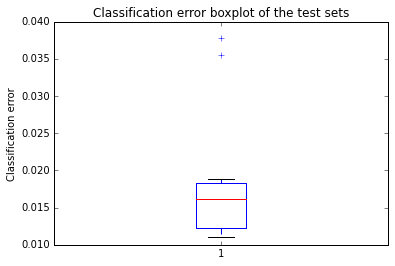

In [128]:
# Calculate the variance of the test sets classification errors

print('The variance of the test sets errors is : %f'%np.var(classErrors))
print('The standard deviation of the test sets errors is : %f'\
     %np.std(classErrors))
print('The mean of the test sets errors is : %f'\
     %np.mean(classErrors))
# create a boxplot of the data
plt.boxplot(classErrors)
plt.title("Classification error boxplot of the test sets")
plt.ylabel('Classification error')
plt.savefig('boxplot.png')

<a id="exD"></a>
<center> <h2>Decision stump classifier with weighted objects</h2></center>
<div style="text-align:right">
<a href="#top">[Back to top]</a>
</div>

In [117]:
# For the weighted version of our stump classifier we change
# the way we calculate the classification error in function
# stump and we create a new version weightedStump

def weightedStump(df,feat):

    fVals = list(unique(df[feat].values))
    fVals.sort()
    thres = [(fVals[i]+fVals[i+1])/2 for i in range(0,len(fVals)-1)]
    dataPoints = df.shape[0]
    
    # results contains missclassification error, threshold value and sign
    res = {'threshold':0,'error':2,'sign':''}
    #print("Number of dataPoints: %d" %dataPoints)
    # class1 label = -1 and class2 label = 1
    for th in thres:
        
        # bigger than thres then class1, less than thres then class2
        # classification error calculated with regard of the weights per
        # data points
        
        missClassErr1 = df[(df[feat]>th) & (df['Labels']==1)].sum(axis=0)['Weights'] + \
                        df[ (df[feat]<th) & (df['Labels']==-1)].sum(axis=0)['Weights']

        missClassErr2 = df[(df[feat]>th) & (df['Labels']==-1)].sum(axis=0)['Weights'] + \
                        df[ (df[feat]<th) & (df['Labels']==1)].sum(axis=0)['Weights']

        if missClassErr1 < missClassErr2:
            sign = '>'
            minimum = missClassErr1
        else:
            sign = '<'
            minimum = missClassErr2

        if minimum < res['error']:
            res['threshold'] = th ; res['error']= minimum ; res['sign'] = sign

    return res

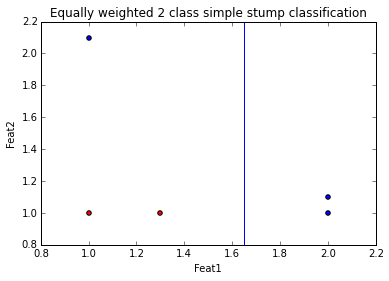

In [129]:
# create a weighted version of the simpleData data set
wSimpleData = simpleData.copy(deep=True)
wSimpleData['Weights'] = [0.4,0.39,0.07,0.07,0.07]

uwRes = stumpClassifier(wSimpleData,weighted=False)

ax = wSimpleData[wSimpleData['Labels']==-1].plot(kind='scatter',x='Feat1',
                                         y='Feat2',
                                         c='red')
wSimpleData[wSimpleData['Labels']==1].plot(ax=ax,kind='scatter',x='Feat1',
                                         y='Feat2',
                                         c='blue')
plt.axvline(uwRes['threshold'])
plt.title('Equally weighted 2 class simple stump classification')
plt.savefig('eqw.png')

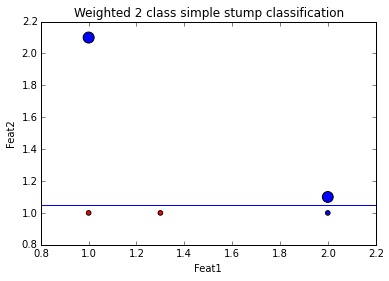

In [130]:
wRes = stumpClassifier(wSimpleData,weighted=True)

ax = wSimpleData[wSimpleData['Labels']==1].plot(kind='scatter',\
                                        x='Feat1',\
                                        y='Feat2',\
                                        c='blue',\
                                        s=300*wSimpleData[wSimpleData['Labels']==1]['Weights'].values)

wSimpleData[wSimpleData['Labels']==-1].plot(ax=ax,kind='scatter',\
                                        x='Feat1',\
                                        y='Feat2',\
                                        c='red',\
                                        s=300*wSimpleData[wSimpleData['Labels']==-1]['Weights'].values)

plt.axhline(wRes['threshold'])
plt.title('Weighted 2 class simple stump classification')
plt.savefig('uneqw.png')

<a id="exE"></a>
<center> <h2> AdaBoost Algorithm </h2></center>
<div style="text-align:right">
<a href="#top">[Back to top]</a>
</div>

The AdaBoost algorithm we implement here takes as input the number of iterations or number of weak learners as well as the data set in a python DataFrame structure, and outputs the ALPHA parameters and the weak learners. The classification of a data point is determined by those values returned by the known formula:

<center>$f(\cdot)=sign\left ( \sum_{k=1}^{T}a_{k}\varphi (\cdot,\vartheta _{k}) \right )$</center>


In [142]:
# A helper function to returns the missclassified objects
# of a data set compared to the decision stump classifier

def calculateErrors(df,sRes):
    errors = []
    th = sRes['threshold']
    sign = sRes['sign']
    f = sRes['feature']

    if sign=='<':
        for i in range(0,df.shape[0]):
            if (df.ix[i][f] < th) and (df.ix[i]['Labels']!=-1):
                errors.append(1)
            else:
                errors.append(0)
    else:
        for i in range(0,df.shape[0]):
            if (df.ix[i][f] > th) and (df.ix[i]['Labels']!=-1):
                errors.append(1)
            else:
                errors.append(0)

    return errors

# The AdaBoost algorighm implementation

def AdaBoost(df,T):

    (r,c) = df.shape
    # initialization of the weights
    weights = r*[1/r]
    df['Weights'] = r*[1/r]
    alphas = []
    stumps = []

    for i in range(0,T):

        theta = stumpClassifier(df,weighted=True)
        p = theta['error']
        alpha = 0.5 * log((1-p)/p)
        errs = calculateErrors(df,theta)
        w = r*[0]
        for j in range(0,r):
            if errs[j]==1: w[j] = weights[j] * np.exp(alpha)
            else: w[j] = weights[j] * np.exp(-alpha)
        weights = [we/sum(w) for we in w]
        df['Weights'] = weights
        alphas.append(alpha)
        stumps.append(theta)

    return alphas,stumps,weights

# A functions that is called to output the prediction of an
# AdaBoost classifier

def AdaBoostPredict(elem,alphas,stumps):
    labels=[]
    for stump in stumps:
        if stump['sign'] == '<':
            if elem[stump['feature']]<stump['threshold']: labels.append(-1)
            else: labels.append(1)
        else:
            if elem[stump['feature']]>stump['threshold']: labels.append(-1)
            else: labels.append(1)
    return np.sign((np.array(alphas)*np.array(labels)).sum())



<a id="exF"></a>
<center> <h2> AdaBoost test on data sets </h2></center>
<div style="text-align:right">
<a href="#top">[Back to top]</a>
</div>

<p style="margin-top:2cm;font-size:large">AdaBoost tested on 2 Gaussian classes, the radius of the objects in the scatter plot are proportional to the weights calculated by the algorithm for each of them</p>

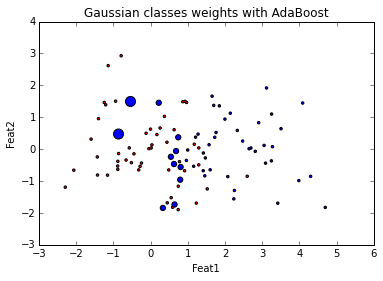

In [151]:
a,s,w = AdaBoost(gaussDataFrame,100)
ax = gaussDataFrame[gaussDataFrame['Labels']==-1].plot(kind='scatter',
                                    x='Feat1',y='Feat2',
                                    s=1000*np.array(w[0:50]),
                                   c='red')
gaussDataFrame[gaussDataFrame['Labels']==1].plot(ax=ax,kind='scatter',
                                   x='Feat1',y='Feat2',
                                   s=1000*np.array(w[50:101]),
                                   c='blue')
plt.title("Gaussian classes weights with AdaBoost")
plt.savefig("gaussAda.png")

<p style="margin-top:2cm;font-size:large">AdaBoost tested on banana data set from PRTools, the radius of the objects in the scatter plot are proportional to the weights calculated by the algorithm for each of them</p>

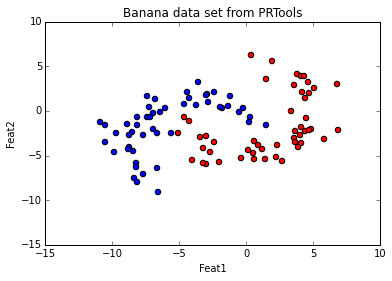

In [149]:
# Import banana data set from PRtools
banana = pd.read_csv('banana.csv',header=None)
banana.columns=['Feat1','Feat2']
banana['Labels'] = 50*[-1] + 50*[1]
ax = banana[banana['Labels']==-1].plot(kind='scatter',
                                    x='Feat1',y='Feat2',
                                    s=30,
                                   c='red')
banana[banana['Labels']==1].plot(ax=ax,kind='scatter',
                                   x='Feat1',y='Feat2',
                                   s=30,
                                   c='blue')
plt.title("Banana data set from PRTools")
plt.savefig('banana.png')

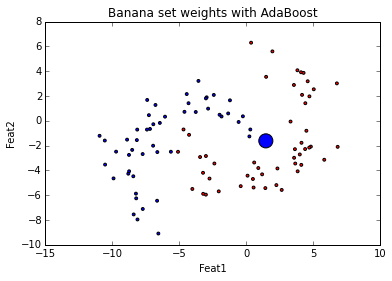

In [150]:
ab,sb,wb = AdaBoost(banana,100)
ax = banana[banana['Labels']==-1].plot(kind='scatter',
                                    x='Feat1',y='Feat2',
                                    s=1000*np.array(wb[0:50]),
                                   c='red')
banana[banana['Labels']==1].plot(ax=ax,kind='scatter',
                                   x='Feat1',y='Feat2',
                                   s=1000*np.array(wb[50:101]),
                                   c='blue')
plt.title('Banana set weights with AdaBoost')
plt.savefig('banAda.png')

<a id="exG"></a>
<center> <h2> AdaBoost on digits data set </h2></center>
<div style="text-align:right">
<a href="#top">[Back to top]</a>
</div>

<p>We train AdaBoost with the first 50 objects of each class from the digits data set for different number of iterations. Then we test the true classification error for the remaining objects that form our test set.</p>

In [154]:
train1.index = range(0,len(train1))
test1.index = range(0,len(test1))
labs = list(test1.Labels.values)

# test true errors for AdaBoost with 50,100,150,200,300 T (iterations)

T = 50
a1,s1,w1 = AdaBoost(train1,T)
preds1 = []
for i in range(0,len(test1)):
    preds1.append(AdaBoostPredict(test1.ix[i],a1,s1))
eq1 = [int(preds1[i]==labs[i]) for i in range(0,len(labs))]
err1 = len(test1) - sum(eq1)
print('The error obtained with T=%d is %f'%(T,err1/900))

T = 100
a2,s2,w2 = AdaBoost(train1,T)
preds2 = []
for i in range(0,len(test1)):
    preds2.append(AdaBoostPredict(test1.ix[i],a2,s2))
eq2 = [int(preds2[i]==labs[i]) for i in range(0,len(labs))]
err2 = len(test1) - sum(eq2)
print('The error obtained with T=%d is %f'%(T,err2/900))

T = 150
a3,s3,w3 = AdaBoost(train1,T)
preds3 = []
for i in range(0,len(test1)):
    preds3.append(AdaBoostPredict(test1.ix[i],a3,s3))
eq3 = [int(preds3[i]==labs[i]) for i in range(0,len(labs))]
err3 = len(test1) - sum(eq1)
print('The error obtained with T=%d is %f'%(T,err3/900))

T = 200
a4,s4,w4 = AdaBoost(train1,T)
preds4 = []
for i in range(0,len(test1)):
    preds4.append(AdaBoostPredict(test1.ix[i],a4,s4))
eq4 = [int(preds4[i]==labs[i]) for i in range(0,len(labs))]
err4 = len(test1) - sum(eq1)
print('The error obtained with T=%d is %f'%(T,err4/900))

T = 300
a5,s5,w5 = AdaBoost(train1,T)
preds5 = []
for i in range(0,len(test1)):
    preds5.append(AdaBoostPredict(test1.ix[i],a5,s5))
eq5 = [int(preds5[i]==labs[i]) for i in range(0,len(labs))]
err5 = len(test1) - sum(eq1)
print('The error obtained with T=%d is %f'%(T,err5/900))

The error obtained with T=50 is 0.015556
The error obtained with T=100 is 0.015556
The error obtained with T=150 is 0.015556
The error obtained with T=200 is 0.015556
The error obtained with T=300 is 0.015556
